## CURSO: Análisis de datos

## ESTs: Jainer Pabón Borja 
## Sary  Guerra Suarez

## TEMA: Algoritmos de aprendizaje no supervisado

In [7]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [19]:
#carga de dataset y muestra de las primeros 5 filas
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
#Mirar el tamaño del dataset
dataset.shape

(200, 5)

In [29]:
data = dataset.drop(['Gender'], axis=1)
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [31]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [33]:
#mirar si hay valores nulos
data.isna().sum()

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [35]:
#en caso qque hubiesen valores nulos, eliminariamos esas filas 
data.dropna()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


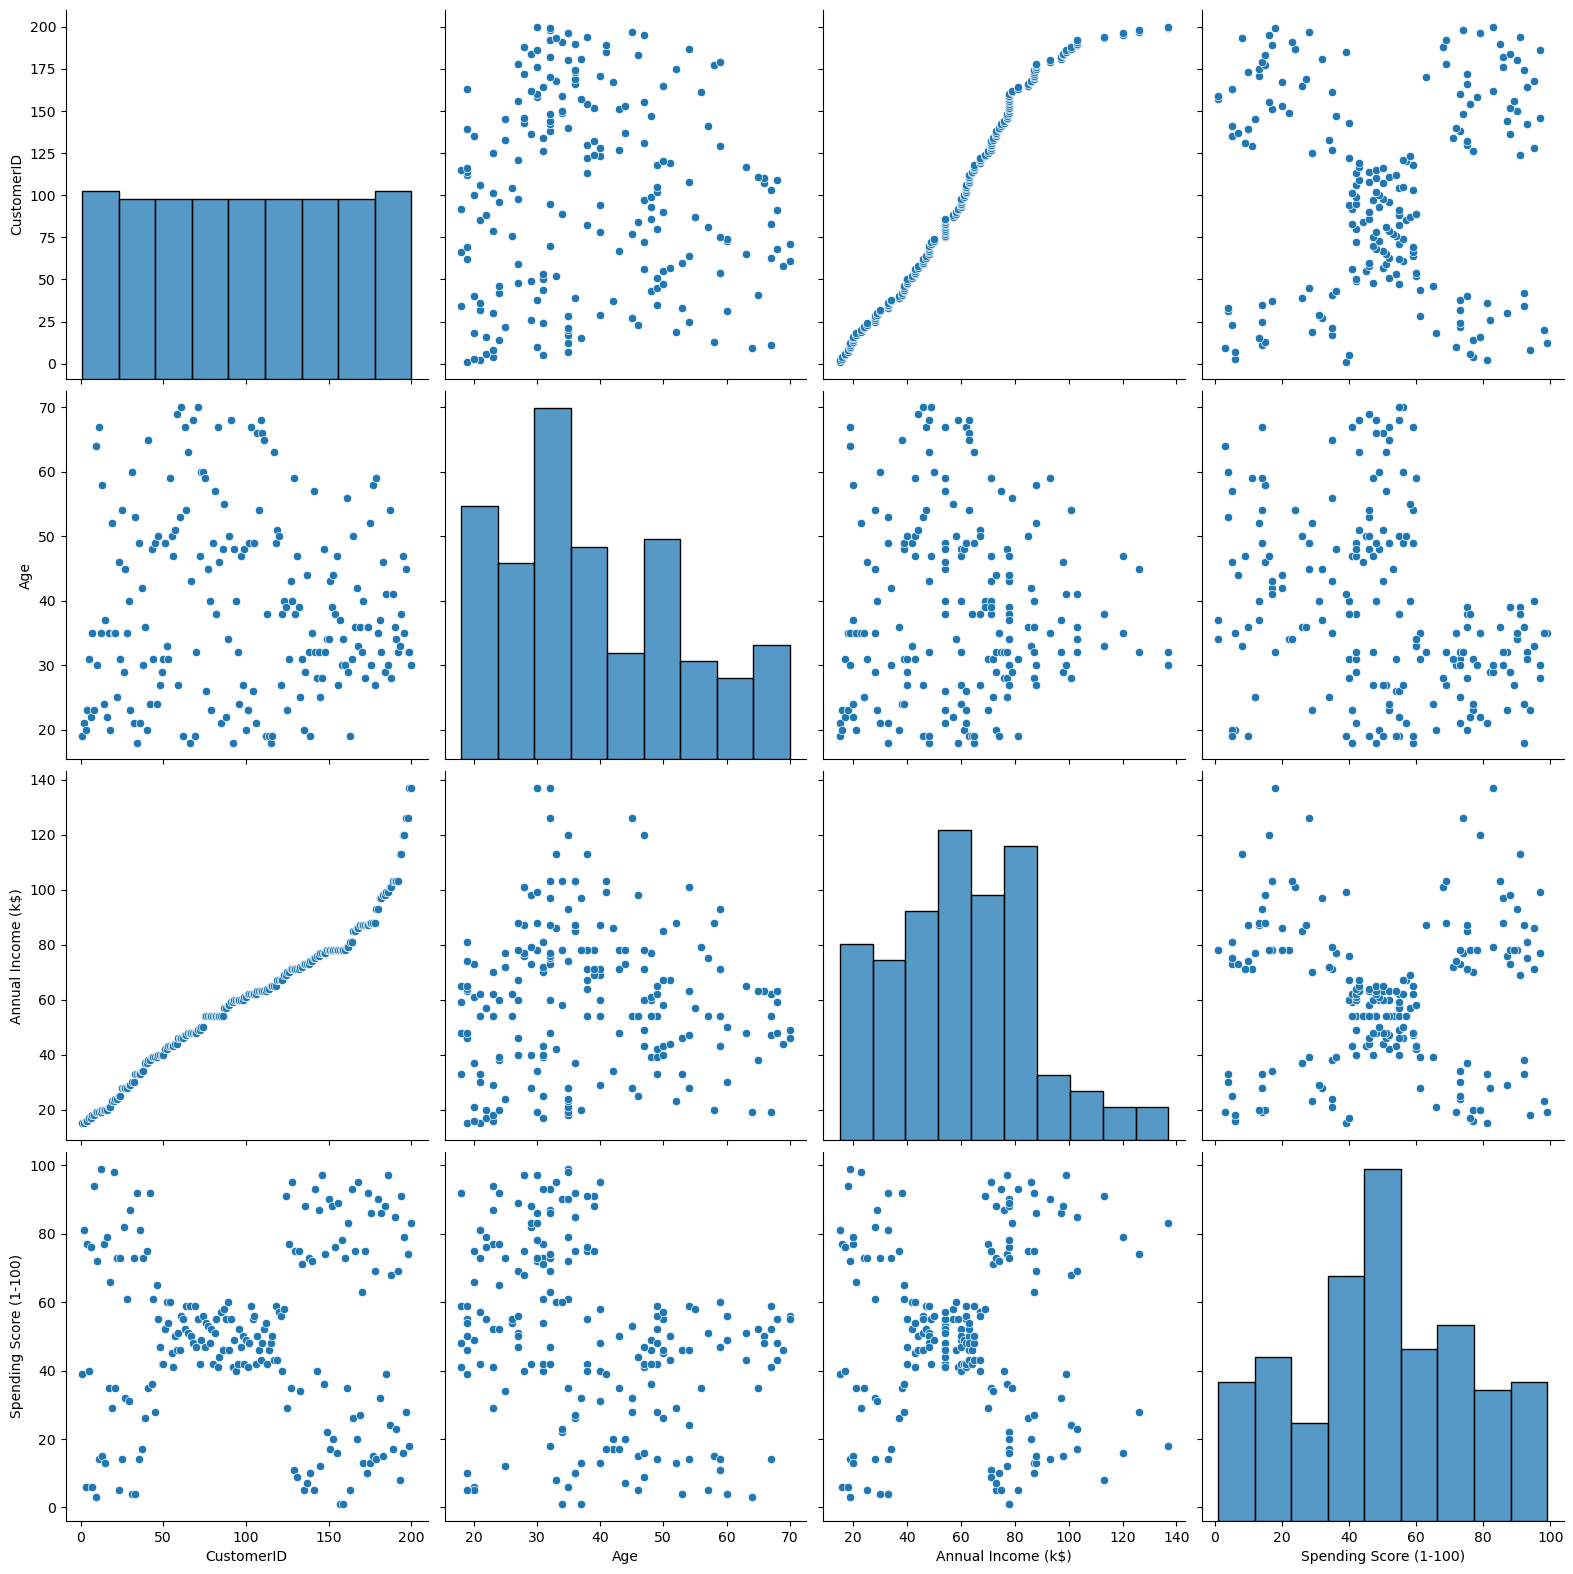

In [37]:
#explorar visualmente las relaciones entre las variables
sns.pairplot(data.dropna(), size=4, kind='scatter')


In [39]:
#ver matriz de correlación 
corr_matrix = data.corr()
corr_matrix

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

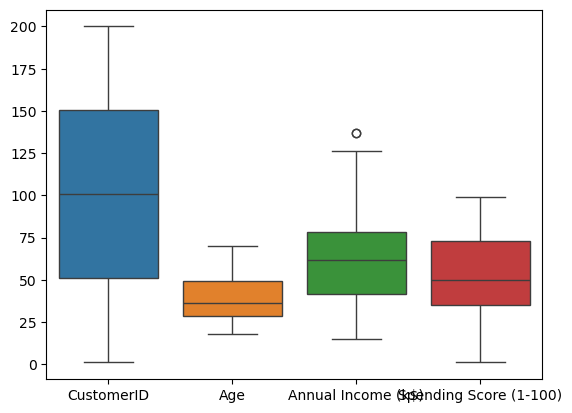

In [41]:
#ver diagrama de caja para cada variable por género
sns.boxplot(data=data)

In [43]:
#estandalizar datos antes de k-means
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
X

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


## K-Means 

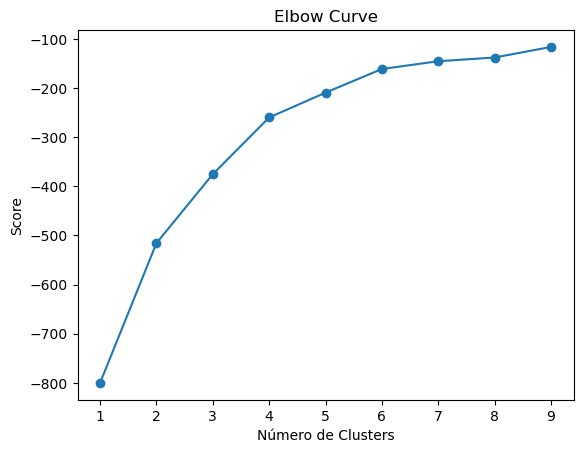

In [64]:
Nc = range(1,10) 
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans 
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc, score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [68]:
kmeans = KMeans (n_clusters=6).fit(X)
centroids = kmeans.cluster_centers_
centroids

array([[-0.32003975,  1.25526464, -0.26166879, -0.03158663],
       [ 1.06522456, -0.44191719,  0.99158305,  1.23950275],
       [-0.09982207, -0.8976502 , -0.08264686, -0.14976949],
       [ 1.13608207,  0.30000651,  1.09016516, -1.2547599 ],
       [-1.33905697,  0.47895722, -1.30822992, -1.19644353],
       [-1.32157129, -0.95377931, -1.30081415,  1.01091344]])

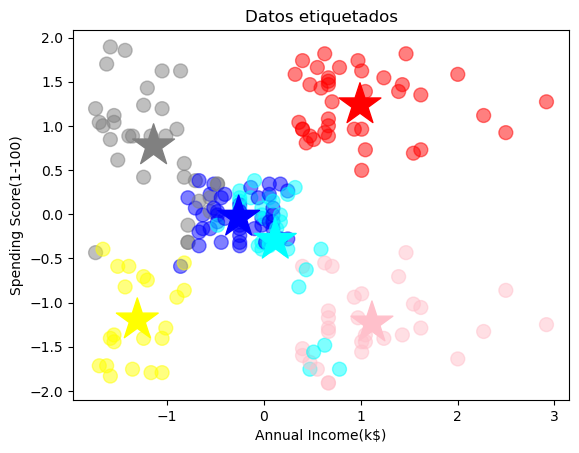

In [104]:
# Obtener etiquetas de cada punto de los datos
labels = kmeans.labels_

# Obtener los centroides
J = kmeans.cluster_centers_

# Definir colores para los clusters
colores = ['yellow', 'blue', 'pink', 'red', 'grey', 'cyan']

# Asignar colores a cada punto según su etiqueta
asignar = [colores[label] for label in labels]

# Variables del DataFrame
f1 = X['CustomerID'].values
f2 = X['Age'].values
f3 = X['Annual Income (k$)'].values
f4 = X['Spending Score (1-100)'].values

# Gráfica de dispersión de los datos etiquetados
plt.scatter(f3, f4, c=asignar, s=100, alpha=0.5)  # Datos con color según cluster
plt.scatter(J[:, 2], J[:, 3], marker='*', c=colores, s=1000)  # Centroides

# Configuración del gráfico
plt.title('Datos etiquetados')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()


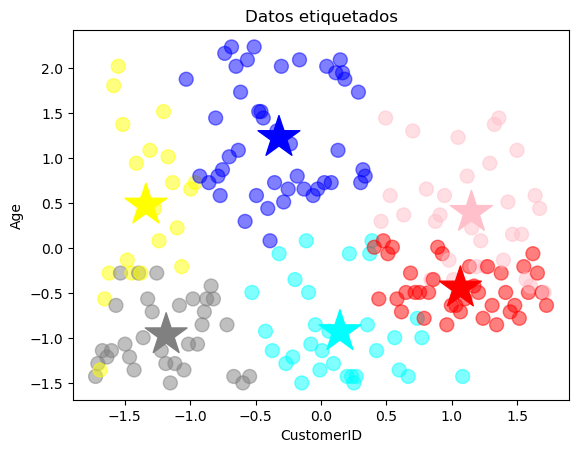

In [108]:
plt.scatter(f1, f2, c=asignar, s=100, alpha=0.5)  # Datos con color según cluster
plt.scatter(J[:, 0], J[:, 1], marker='*', c=colores, s=1000)  # Centroides
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Age')
plt.show()

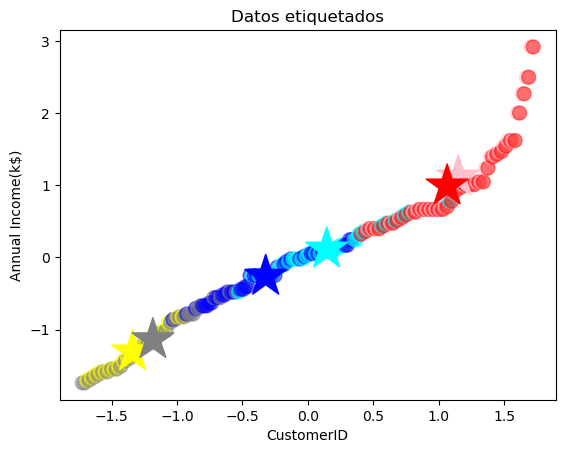

In [110]:
plt.scatter(f1, f3, c=asignar, s=100, alpha=0.5)  # Datos con color según cluster
plt.scatter(J[:, 0], J[:, 2], marker='*', c=colores, s=1000)  # Centroides
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Annual Income(k$)')
plt.show()

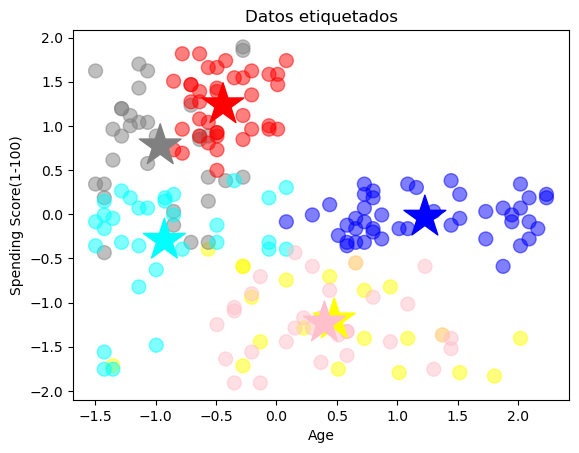

In [112]:
plt.scatter(f2, f4, c=asignar, s=100, alpha=0.5)  # Datos con color según cluster
plt.scatter(J[:, 1], J[:, 3], marker='*', c=colores, s=1000)  # Centroides
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

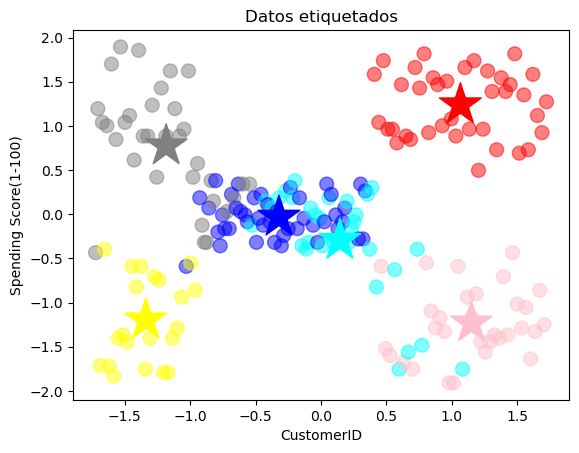

In [114]:
plt.scatter(f1, f4, c=asignar, s=100, alpha=0.5)  # Datos con color según cluster
plt.scatter(J[:, 0], J[:, 3], marker='*', c=colores, s=1000)  # Centroides
plt.title('Datos etiquetados')
plt.xlabel('CustomerID')
plt.ylabel('Spending Score(1-100)')
plt.show()

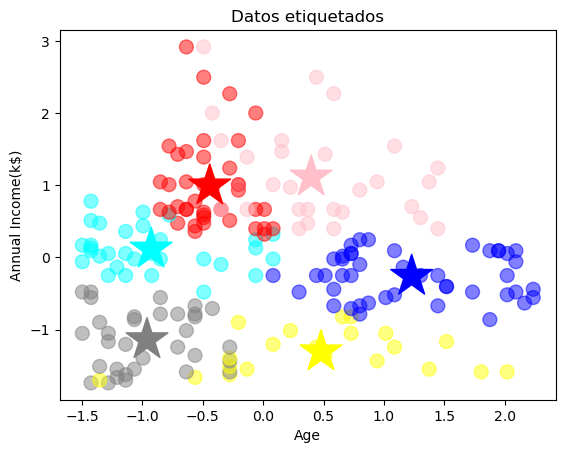

In [116]:
plt.scatter(f2, f3, c=asignar, s=100, alpha=0.5)  # Datos con color según cluster
plt.scatter(J[:, 1], J[:, 2], marker='*', c=colores, s=1000)  # Centroides
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Annual Income(k$)')
plt.show()

In [125]:
X_new = scaler.fit_transform(np.array([[3.4,2.3,1.2,1.25]]))
new_label = kmeans.predict(X_new)
color = []
for row in new_label:
    color.append(colores[row])
print(new_label)
print(color)

[5]
['cyan']


In [127]:
#calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")

print("Puntaje de silueta: ", metrics.silhouette_score(X, labels))

print("Indice de Calinski-Harabasz: ", metrics.calinski_harabasz_score(X, labels))

print("Inertia (suma de cuadrados dentro de los clusters): ", kmeans.inertia_)

print("Davies-Bouldin Index: ", metrics.davies_bouldin_score(X, labels))

Medidas de calidad para K-Means:
Puntaje de silueta:  0.43029004820761474
Indice de Calinski-Harabasz:  149.99860713232644
Inertia (suma de cuadrados dentro de los clusters):  164.4079925772147
Davies-Bouldin Index:  0.8183506633768558
